In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Gathering

In [2]:
#loading the twitter-archive-enhanced.csv file into a dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Retrieve image-predictions.tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)


In [4]:
# Load image prediction data into a dataframe
img_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#reading 'tweet_json.txt' and load it into a dataframe
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweet_count = data[tweet_id]['retweet_count']
    fav_count = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': fav_count})
    
json_tweets_df = pd.DataFrame(df_list)


# Assesment
Three dataframes:
 * `json_tweets_df` which has retweet and favorite counts
 * `img_predictions_df` has the results of a neural network trying to identify dog breed in a tweet's picture
 * `twitter_archive_df` has the tweet's text, rating, and dog category

In [6]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id          2351 non-null object
retweet_count     2351 non-null int64
favorite_count    2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [7]:
json_tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8831,39442
1,892177421306343426,6470,33747
2,891815181378084864,4291,25418
3,891689557279858688,8907,42806
4,891327558926688256,9690,40946


In [8]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Dug           1
Ike           1
Sundance      1
Huxley        1
Mo            1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
# Compute basic stats on rating_numerator and rating_denominator columns in tweet_data_archived
twitter_archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [17]:
# Compute basic stats on retweet_count and favorite_count columns in tweet_data_extra
json_tweets_df[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


In [18]:
# Compute basic stats on the p*_conf columns of tweet_image_pred
img_predictions_df[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
assert [img_predictions_df.duplicated() == False]

In [20]:
assert [json_tweets_df.tweet_id.duplicated() == False]

In [21]:
twitter_archive_df[twitter_archive_df['rating_denominator'] == 0 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [22]:
img_predictions_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bannister               1
washer                  1
dining_table            1
radio_telescope         1
beaver                  1
Name: p1, Length: 378, dtype: int64

### Quality (completeness, validity, accuracy, and consistency issues)
"twitter_archive_df" has 2356 rows while the "img_predictions_df" has only 2075 rows and "json_tweets_df" has 2351 rows

Completeness

* missing retweet and favorite data for 5 tweets (`json_tweets_df`)
* missing img predictions for some tweets (`img_predictions_df`)
* Some columns like (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id) are missing ‎too many values and might not be needed in this analysis
* "twitter_archive_df" contains 181 retweets and 78 replies which not needed.

Validity
not all the data are in their most appropriate data type

(`twitter_archive_df`):
* `tweet_id` is int
* `timestamp` is str
* `in_reply_to_status_id` is float
* `in_reply_to_user_id` is float
* `retweeted_status_id` is float
* `retweeted_status_user_id` is float
* `retweeted_status_timestamp` is str
* there are many names of dogs which are clearly incorrect such as 'a','the', 'actually', 'all'

(`img_predictions_df`):
* `tweet_id` is int 
* There are some strange values in the p1 columns such as “school_bus, pillow, cartoon” ‎these cells must be checked first then deleted if not needed

(`json_tweets_df`):
* retweets and favorites are float

Consistency
* strange unexpected values in rating_denominator (extreme values)  
* strange unexpected values in rating_numerator (extreme values)
* For the column “rating_denumirator” there is a zero value. delete it.

### Tidiness (structural issues)

* there are 3 dataframes, only 1 dataframe should suffice to incorporate the data we need.
* there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive_df" but this is same categorical data that   would be better in only 1 column.
* there are 3 predictions for the dog breed in the "img_predictions_df" but maybe the best prediction will suffice to reduce the size of the final dataframe.





# Cleaning

In [23]:
# Creat a copy of the original 3 datasets for reference
archive_clean = twitter_archive_df.copy()
json_clean = json_tweets_df.copy()
img_pred_clean = img_predictions_df.copy()

In [24]:
# Save a copy of the clean datasets to work with
archive_clean.to_csv('archive_clean.csv',encoding='utf-8',index=False)
img_pred_clean.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [27]:
archive_clean = pd.read_csv('archive_clean.csv')
img_pred_clean = pd.read_csv('image_clean.csv')
json_clean = pd.read_csv('json_clean.csv')

#### 1) Merge the 3 dataframes into 1 master dataframe

In [28]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
archive_master_df = pd.merge(archive_clean, json_clean, on=['tweet_id','tweet_id'],how='left') 

In [29]:
# Merge new master with img_pred_clean
archive_master_df = pd.merge(archive_master_df, img_pred_clean, on='tweet_id',how='left') 

In [30]:
# Increase number of visible columns in a pandas DataFrame to see all the columns in the newly created master_df
pd.set_option("display.max_columns",30)

In [31]:
# Check merge 
archive_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8831.0,39442.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6470.0,33747.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
# Check twitter_archive_master_df
archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

In [33]:
# Save a copy of the newly created master dataframe has a starting point for cleaning
archive_master_df.to_csv('archive_master.csv',encoding='utf-8',index=False)

In [34]:
df = pd.read_csv('archive_master.csv')

#### 2)  Remove Retweets and Replies

In [35]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [36]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [37]:
# check the retweet columns removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

In [38]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
df = df[df.in_reply_to_status_id.isnull()]

In [39]:
# delete the columns related to replies from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [40]:
# check the replies columns removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 3)  Remove tweets that don't have an image

In [41]:
# After deleting the retweets and replies we still have 126 tweets without an image,so delete the tweets without an image. 
# keep the rows with an image
df = df[df.jpg_url.notnull()]

In [42]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### 4)  Melt the 4 categorical dog types 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_type'

In [43]:
# Create list of columns for copying and pasting with melt function
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [44]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
df1 = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [45]:
# Check we still have all our dog types
df1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [46]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
df1 = df1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [47]:
# We have lost 10 doggos!
df1.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [48]:
#  reiterate over the twitter_archive_master_df in order to identify the 10 tweet_ids. 
# create a dataframe that contained only tweet ids with doggo, floofer, pupper and puppo.
doggos_df = df.drop(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], axis=1)

In [49]:
#  set the rows to 75 to be able to see all the rows.
pd.set_option("display.max_rows",75)

# sort the dataframe to see all doggos and be able to manually identify the tweet_ids.
doggos_df = doggos_df[doggos_df.doggo != 'None']
doggos_df

,tweet_id,doggo,floofer,pupper,puppo
9,890240255349198849,doggo,None,None,None
43,884162670584377345,doggo,None,None,None
99,872967104147763200,doggo,None,None,None
108,871515927908634625,doggo,None,None,None
121,869596645499047938,doggo,None,None,None
172,858843525470990336,doggo,None,None,None
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
240,846514051647705089,doggo,None,None,None
248,845397057150107648,doggo,None,None,None


Manually created list from doggos_df showing the tweet_ids that have more than 1 dog type. Then manually read the
text to try to understand the correct dog type. 

Tweet_id.........................Pre-melt types....Correct Dog Type....Need to Change       
855851453814013952 ..doggo/puppo.......puppo......................no               
854010172552949760 ..doggo/floofer.......floofer.......................no                 
817777686764523521 ..doggo/pupper......doggo...................yes to doggo           
808106460588765185 ..doggo/pupper......both - 2 dogs........yes to none           
801115127852503040 ..doggo/pupper......doggo...................yes to doggo          
785639753186217984 ..doggo/pupper......doggo...................yes to doggo          
759793422261743616 ..doggo/pupper......both - 2 dogs........yes to none           
751583847268179968 ..doggo/pupper......none......................yes to none            
741067306818797568 ..doggo/pupper......both - 2 dogs.........yes to none            
733109485275860992 ..doggo/pupper......both - 2 dogs.........yes to none    

In [50]:
# Change dog types identified in the tweet_ids above
df1.loc[df1.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [51]:
# Delete column 'types'
df1 = df1.drop('types',axis=1)

In [52]:
# Check the dataframe status and the dog type value counts.
df1.info()
df1.dog_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 

None       1673
pupper      201
doggo        66
puppo        23
floofer       8
Name: dog_type, dtype: int64

#### 5)  Reducing the 3 columns that predict the Breed of the dog in the image to the most likely

In [53]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df1.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df1['breed'] = breed
df1['confidence'] = confidence

# check the columns have been added
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,488.0,232.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,324.0,88.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091


In [54]:
# Drop predictions and prediction probability columns
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [55]:
# Check columns have been dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 231.0+ KB


#### 6)  Change dog names in names column for clearly incorrect data

In [56]:
# Check the list of dog names.
list(df1['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

In [57]:
# We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df1.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df1['names'] = names
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence,names
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,488.0,232.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,Biden
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,324.0,88.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,None
1893,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,479.0,257.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000,None
1892,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,828.0,617.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000,None
1891,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,326.0,96.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,Cupcake


In [58]:
# print a list to check only names are present
df1['names'].unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Naphaniel',
       'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin',
       'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Kenneth', 'Clarence', 'Timison', 'Filup', 'Shaggy', 'Josep',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Lugan', 'Christoper', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti',
       'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow',
       'Beau', 'Derek', 'Mingus', 'Maya', 'Canela', 'Jeffrey', 'Gerald',
       'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey',
       'Jax', 'Franklin', 'Darla', 'Archie', 'Tilly', 'Waffles', 'Jimbo',
       'Steven', 'Jack', 'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella',
       'Louis', 'Elliot', 'Gary', 'Rey', 'Koko', 'Alfy', 'Stanley',
       'Ru

In [59]:
# update original name column
df1['name'] = df1['names']

In [60]:
# delete names column
df1 = df1.drop('names', axis=1)

In [61]:
# check name column is updated correctly.
df1['name'].value_counts()

None       622
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Al           1
Chase        1
Gilbert      1
Carbon       1
Kramer       1
Name: name, Length: 913, dtype: int64

#### 7)  Remove unnecessary numbers from timestamp column and change data type to datetime

In [62]:
# Strip +0000 from timestamp column
df1.timestamp = df1.timestamp.str.strip('+0000')

In [63]:
# Convert data type to datetime
df1.timestamp = pd.to_datetime(df1.timestamp)

In [64]:
# Check the changes 
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null float64
retweet_count         1971 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 231.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,488.0,232.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,324.0,88.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


#### 8)  Convert each column to its most appropriate data type

In [65]:
# Convert data types to most suitable data type and round confidence to 2 decimal places to make easier to read
df1['tweet_id'] = df1['tweet_id'].astype(str)
df1['source'] = df1['source'].astype('category')
df1['favorite_count'] = df1['favorite_count'].astype(int)
df1['retweet_count'] = df1['retweet_count'].astype(int)
df1['dog_type'] = df1['dog_type'].astype('category')
df1['confidence'] = df1['confidence'].round(2)

In [66]:
# Check 
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        1971 non-null int32
retweet_count         1971 non-null int32
jpg_url               1971 non-null object
dog_type              1971 non-null category
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 188.9+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,488,232,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.38
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,324,88,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,1.00


#### 9)  Investigate surprising values in rating_denominator

In [67]:
# List the different denominators
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [68]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df1.drop(['timestamp','source','expanded_urls','name','favorite_count','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [69]:
# Filter new dataframe to include only denominators not equal to 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [70]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)

In [71]:
rating_df

,tweet_id,text,rating_numerator,rating_denominator
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


In [72]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 9/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# Reading the text of Tweet_id 682962037429899265 - the correct value should be 10/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# Reading the text of Tweet_id 716439118184652801 - the correct value should be 11/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# Reading the text of Tweet_id 810984652412424192 - there is no correct value in the text so allocated 10/10
# so has to be neutral
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# Reading the text of Tweet_id 740373189193256964 - the correct value should be 14/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10
# Reading the text of Tweet_id 722974582966214656 - the correct value should be 13/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10


In [73]:
# check the above changes 
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

#### 10)  Investigate surprising values in rating_numerator

In [74]:
# List the different numerators
df1.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [75]:
# Create another new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating2_df = df1.drop(['timestamp','source','expanded_urls','name','favorite_count','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [76]:
# This time our expectation would be a value between 0 and 14.
# Filter the dataframe to include values outside of the above parameter.
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [77]:
rating2_df

,tweet_id,text,rating_numerator,rating_denominator
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3667,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


In [78]:
# Reading through the others, there are some users giving decimal point evaluations. I will round these to the nearest
# whole number.

df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

# There are 2 tweets with ridiculous ratings of 420/10 and 1776/10, but I'll leave these because it is the rating given
# by the tweeter and the site is a "tongue-in-cheek" site. I just remember to eliminate these outliers in any analyses or
# visualizations.

In [79]:
# check the above changes to the rating_numerator have occurred
df1.rating_numerator.value_counts()

12      446
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [80]:
# Rename columns to make easier to understand for someone not familiar with the original data sets
df1 = df1.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorite_count':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

In [81]:
# Reorder the columns into a logical order
df1 = df1[['tweet_id','tweet_date','tweet_source','tweet_text','dog_name',
           'dog_score','out_of','dog_type','dog_breed','probability_AI_calc',
          'no_of_likes','retweet_count','tweet_url','image_link']]

In [82]:
#  check of the structure of the dataframe
df1.head(5)

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.38,488,232,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,324,88,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
1893,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.00,479,257,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
1892,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.00,828,617,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
1891,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,326,96,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


## Storing

In [83]:
# Save a copy of the dataframe to csv for future reference
df1.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [84]:
df_clean = pd.read_csv('twitter_archive_master.csv')

## Analyzing the Data

In [85]:
# Which breeds are most tweeted
df_clean.dog_breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: dog_breed, dtype: int64

In [86]:
# There were 305 tweets where the breed was unidentified - lets remove these from the analysis
df_clean.loc[df_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

In [87]:
# Number of observations used for analysis and visualizations
df_clean.dog_breed.count()

1666

In [88]:
# Check they have been removed
df_clean.dog_breed.value_counts().nlargest(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

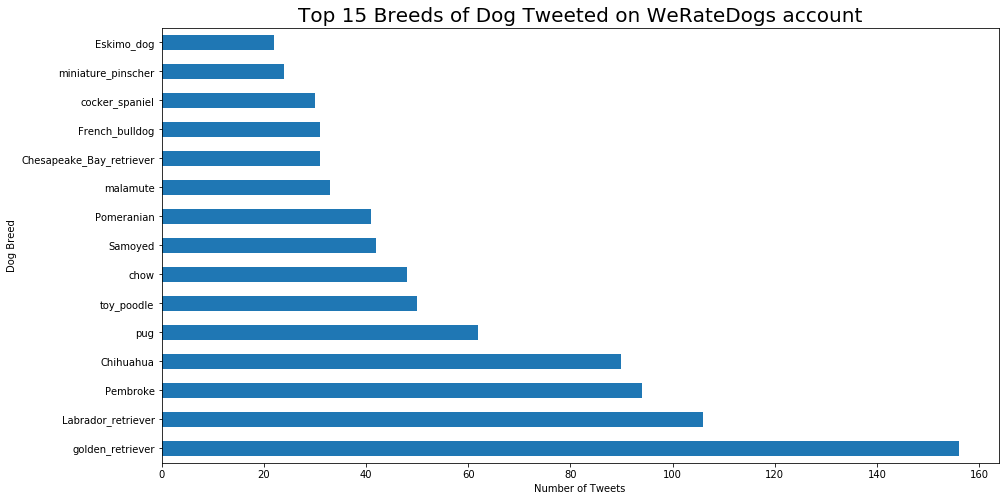

In [89]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed').count()['dog_score'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Breeds of Dog Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

** We can see the top five tweeted dogs in order are Golden Retriever, Labrador Retriever, Pembroke Welsh Corgi, Chihuahua and Pug. **

** With the Golden Retriever receiving substantially more tweets at 156 than the other breeds. **

In [90]:
# Let's look at the ratings for each of the breeds
# Remembering to remove the 2 outliers we identified in the cleaning and the ratings for groups of dogs.
# So we take scores only from 0 to 14.
df_clean1 = df_clean[df_clean['dog_score'] <= 14] 

In [91]:
# Let's look at the statistice for all breeds removing outliers and groups.
df_clean1['dog_score'].describe()

count    1953.000000
mean       10.527394
std         2.189859
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

In [92]:
# Let's group these scores by breed and have a look at some statistics.
df_clean1.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
...,...,...,...,...,...,...,...,...
toy_poodle,50.0,11.000000,1.245400,7.0,10.00,11.0,12.00,13.0
toy_terrier,3.0,10.333333,1.527525,9.0,9.50,10.0,11.00,12.0
vizsla,13.0,10.846154,1.281025,8.0,11.00,11.0,11.00,13.0


In [93]:
# Let's look at the top scores by breed.
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: dog_score, dtype: float64

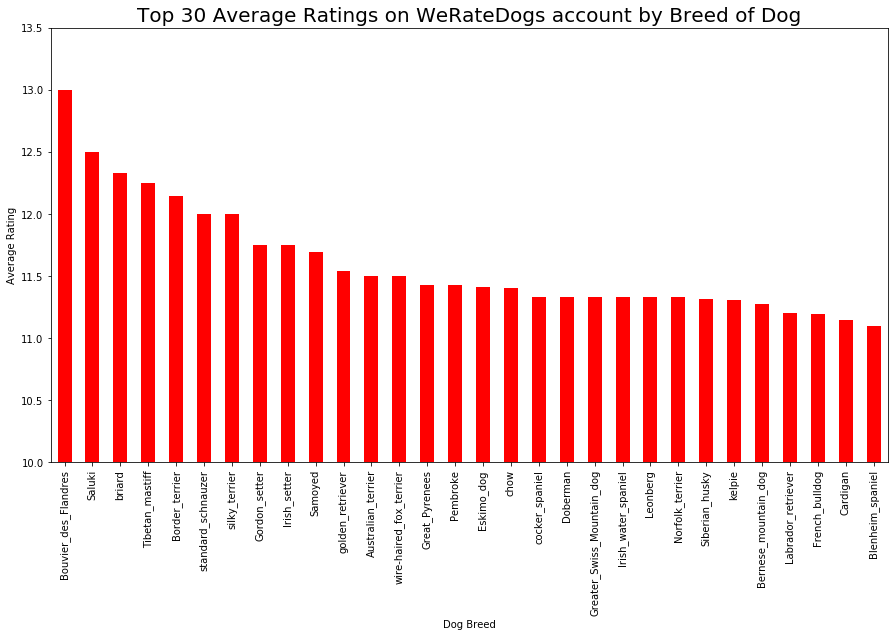

In [94]:
# Let's plot the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

** So the top breeds by rating are Bouvier des Flandres, Saluki, Briard, Tibetan Mastiff and Border Terrier. These breeds are not as well-known as the breeds in our top tweeted dogs. Quickly checking I see that there is only one rating for Bouvier des Flandres. So this plot might be misleading. Let's redo the chart but include only breeds with at least 10 ratings. **  

In [95]:
# Create a variable that includes dog breeds with more than 9 counts
count = df_clean['dog_breed'].value_counts()

In [96]:
# Create a new dataframe which includes only dog breeds with at least 10 ratings
df_clean2 = df_clean[df_clean['dog_breed'].isin(count[count > 9].index)]

In [97]:
# Check the dataframe
df_clean2

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,324,88,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,326,96,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.30,272,102,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.85,558,237,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
8,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.14,558,293,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,787717603741622272,2016-10-16 18:11:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,Tonks,13,10,puppo,German_shepherd,0.99,11360,3214,"https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1",https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg
1966,859607811541651456,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,13,10,puppo,golden_retriever,0.90,19378,1692,https://twitter.com/dog_rates/status/859607811541651456/photo/1,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg
1967,790946055508652032,2016-10-25 16:00:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Betty. She's assisting with the dishes. Such a good puppo. 12/10 h*ckin helpful af https://t.co/dgvTPZ9tgI,Betty,12,10,puppo,golden_retriever,0.25,18503,5451,https://twitter.com/dog_rates/status/790946055508652032/photo/1,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg
1968,756275833623502848,2016-07-21 23:53:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When ur older siblings get to play in the deep end but dad says ur not old enough. Maybe one day puppo. All 10/10 https://t.co/JrDAzMhwG9,None,10,10,puppo,Airedale,0.60,7082,1728,"https://twitter.com/dog_rates/status/756275833623502848/photo/1,https://twit

In [98]:
# Let's filter out the outliers and groups of dogs.
df_clean3 = df_clean2[df_clean2['dog_score'] <= 14]

In [99]:
# statistical summary for these breeds.
df_clean3.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Boston_bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.00,13.0
Chihuahua,90.0,10.500000,2.089299,3.0,10.00,11.0,12.00,14.0


In [100]:
# Let's relook at the top scores by breed.
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Samoyed                 11.690476
golden_retriever        11.538961
Great_Pyrenees          11.428571
Pembroke                11.425532
Eskimo_dog              11.409091
chow                    11.404255
cocker_spaniel          11.333333
Siberian_husky          11.315789
kelpie                  11.307692
Bernese_mountain_dog    11.272727
Name: dog_score, dtype: float64

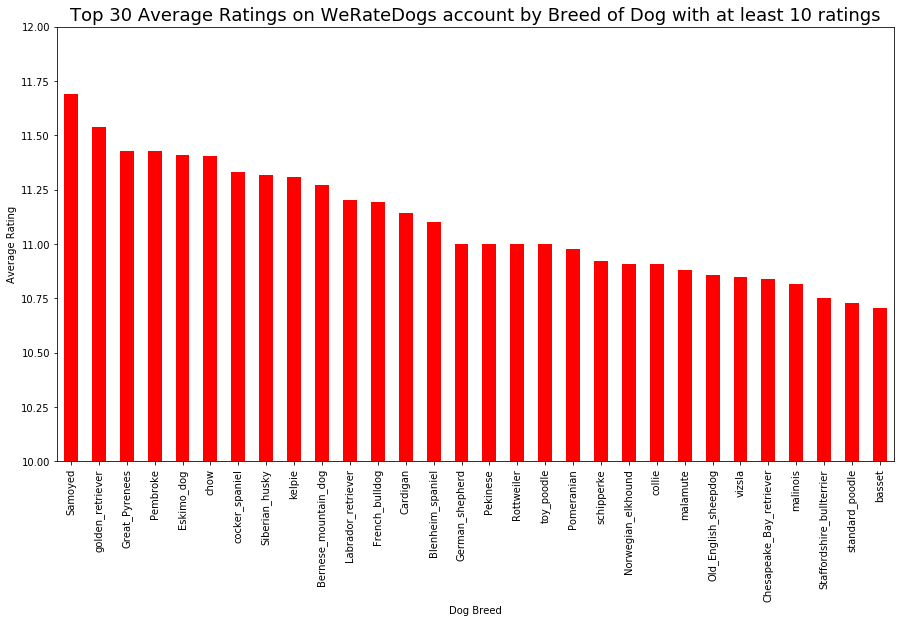

In [101]:
# Let's plot again the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='red')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog with at least 10 ratings",fontsize=18)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

** Now our top rated breeds are Samoyed, Golden Retriever, Great Pyrenees, Pembroke Welsh Corgi and Eskimo Dog. **   

** The Golden Retriver and Pembroke Welsh Corgi appear on both our lists so far. **

In [102]:
# Final analysis breeds with most average likes.
# Using the dataset filtered for breeds with more than 10 ratings, and excluding outliers and groups of dogs.
df_clean3.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,1.00,324,88,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.83,326,96,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.30,272,102,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.85,558,237,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
8,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.14,558,293,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg


In [103]:
# Total number of likes
df_clean3['no_of_likes'].sum()

13471480

In [104]:
# Total number of likes grouped by breed
df_clean3.groupby('dog_breed')['no_of_likes'].sum() 

dog_breed
Airedale                            63040
American_Staffordshire_terrier     149292
Bernese_mountain_dog                79743
Blenheim_spaniel                    92395
Border_collie                      106680
Boston_bull                         63156
Cardigan                           268290
Chesapeake_Bay_retriever           311345
Chihuahua                          754178
English_springer                   140939
Eskimo_dog                         233899
French_bulldog                     568382
German_shepherd                    216429
Great_Dane                          69658
Great_Pyrenees                     182676
Italian_greyhound                  141503
Labrador_retriever                1247253
Lakeland_terrier                   202206
Maltese_dog                         55932
Norwegian_elkhound                 123596
Old_English_sheepdog               104566
Pekinese                            95915
Pembroke                          1034461
Pomeranian              

In [105]:
# Number of tweets per dog breed
df_clean3.groupby('dog_breed')['no_of_likes'].count()

dog_breed
Airedale                           12
American_Staffordshire_terrier     16
Bernese_mountain_dog               11
Blenheim_spaniel                   10
Border_collie                      12
Boston_bull                        12
Cardigan                           21
Chesapeake_Bay_retriever           31
Chihuahua                          90
English_springer                   10
Eskimo_dog                         22
French_bulldog                     31
German_shepherd                    21
Great_Dane                         11
Great_Pyrenees                     14
Italian_greyhound                  17
Labrador_retriever                103
Lakeland_terrier                   17
Maltese_dog                        19
Norwegian_elkhound                 11
Old_English_sheepdog               14
Pekinese                           14
Pembroke                           94
Pomeranian                         40
Rottweiler                         18
Samoyed                            42
Sh

In [106]:
# Average number of likes per tweet for each dog breed
df_clean4 = round(df_clean3.groupby('dog_breed')['no_of_likes'].sum() / df_clean3.groupby('dog_breed')['no_of_likes'].count(),0)
df_clean4.sort_values(ascending=False)

dog_breed
French_bulldog                    18335.0
English_springer                  14094.0
standard_poodle                   13850.0
Samoyed                           13844.0
cocker_spaniel                    13791.0
Great_Pyrenees                    13048.0
whippet                           12857.0
Cardigan                          12776.0
golden_retriever                  12615.0
Labrador_retriever                12109.0
Lakeland_terrier                  11894.0
basset                            11714.0
Norwegian_elkhound                11236.0
Pembroke                          11005.0
malamute                          10815.0
Eskimo_dog                        10632.0
German_shepherd                   10306.0
kelpie                            10049.0
Chesapeake_Bay_retriever          10043.0
chow                               9639.0
Staffordshire_bullterrier          9439.0
American_Staffordshire_terrier     9331.0
Blenheim_spaniel                   9240.0
Border_collie           

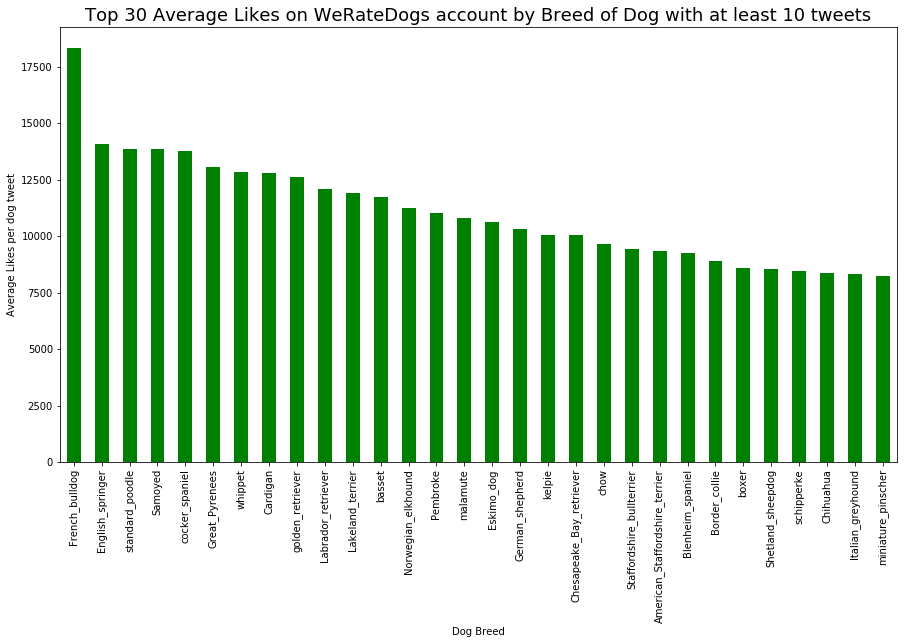

In [107]:
# Let's plot again the average most likes for the top 30 breeds on another bar chart
fig = plt.figure(figsize=(15,8))
df_clean4.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')
plt.title("Top 30 Average Likes on WeRateDogs account by Breed of Dog with at least 10 tweets",fontsize=18)
plt.ylabel("Average Likes per dog tweet")
plt.xlabel("Dog Breed");

** So the French bulldog is clearly the dog most liked on likes/tweet. Obviously very cute to get so many likes! **   

** Also in the top 10 are Samoyed, Great Pyrenees and Golden Retriever, and at number 11 is the Labrador Retriever and number 14 the Pembroke Welsh Corgi from our other visualizations. **   

** Conclusion: The following breeds of dog seem a good place to start for further investigation into practical aspects costs, pedigree, availability, caring needs and whether my family has empathy for the breed and animal in particular. ** 

** Golden Retriever, French Bulldog, Pembroke Welsh Corgi, Samoyed, and Great Pyrenees. **   
